In [1]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

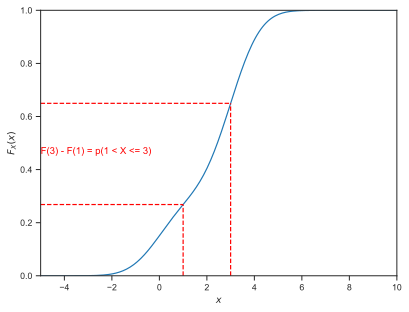

In [2]:
# Standard plot of a CDF for a continuous random variable
# I will use a mixture of Gaussians for visualization purposes
X1 = st.norm(loc=0.0, scale=1)
X2 = st.norm(loc=3, scale=1)
w = 0.3
fig, ax = make_full_width_fig()
xs = np.linspace(-5, 10, 200)
F = lambda x: w * X1.cdf(x) + (1-w) * X2.cdf(x)
Fs = F(xs)
ax.plot(xs, Fs)
ax.set_xlabel('$x$')
ax.set_ylabel('$F_X(x)$')
ax.vlines(1, 0, F(1), 'r', linestyles='--')
ax.hlines(F(1), xs[0], 1, 'r', linestyles='--')
ax.vlines(3, 0, F(3), 'r', linestyles='--')
ax.hlines(F(3), xs[0], 3, 'r', linestyles='--')
ax.set_xlim(xs[0], xs[-1])
ax.set_ylim(0.0, 1.0)
plt.text(xs[0], 0.5 * (F(1) + F(3)), r'F(3) - F(1) = p(1 < X <= 3)', color='r')
save_for_book(fig, 'ch10.fig1')

In [3]:
help(ax.hlines)

Help on method hlines in module matplotlib.axes._axes:

hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Plot horizontal lines at each *y* from *xmin* to *xmax*.

    Parameters
    ----------
    y : float or array-like
        y-indexes where to plot the lines.

    xmin, xmax : float or array-like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have the same length.

    colors : :mpltype:`color` or list of color , default: :rc:`lines.color`

    linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, default: 'solid'

    label : str, default: ''

    Returns
    -------
    `~matplotlib.collections.LineCollection`

    Other Parameters
    ----------------
    data : indexable object, optional
        If given, the following parameters also accept a string ``s``, which is
        interpreted as ``data[s]`` (unless this raises an exception):

 

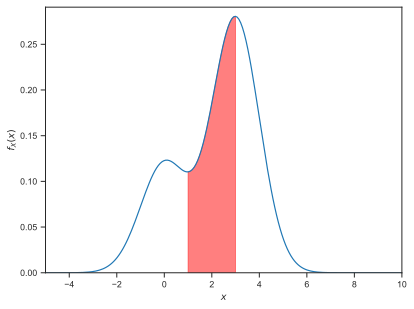

In [4]:
# Standard plot of a PDF for a continuous random variable
# I will use a mixture of Gaussians for visualization purposes
X1 = st.norm(loc=0.0, scale=1)
X2 = st.norm(loc=3, scale=1)
w = 0.3
fig, ax = make_full_width_fig()
xs = np.linspace(-5, 10, 200)
f = lambda x: w * X1.pdf(x) + (1-w) * X2.pdf(x)
fs = f(xs)
ax.plot(xs, fs)
ax.set_xlabel('$x$')
ax.set_ylabel('$f_X(x)$')
xss = np.linspace(1.0, 3.0, 100)
ax.fill_between(xss, np.zeros(xss.shape), f(xss), color='r', alpha=0.5)
#ax.vlines(1, 0, F(1), 'r', linestyles='--')
#ax.hlines(F(1), xs[0], 1, 'r', linestyles='--')
#ax.vlines(3, 0, F(3), 'r', linestyles='--')
#ax.hlines(F(3), xs[0], 3, 'r', linestyles='--')
ax.set_xlim(xs[0], xs[-1])
ax.set_ylim(0.0, fs.max() + 0.01)
#plt.text(xs[0], 0.5 * (F(1) + F(3)), r'F(3) - F(1) = p(1 < X <= 3)', color='r')
save_for_book(fig, 'ch10.fig2')